In [1]:
import sys
sys.path.append('../_amigocloud')

In [2]:
import simplekml

In [3]:
from amigocloud import AmigoCloud
import pandas as pd
from shapely import wkb

import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, MultiPoint
#from shapely.geometry import Point, MultiPoint
import os
#from fastkml import kml

In [4]:
# ruta de carpera donde estan las llaves
ruta = open('../ruta.txt')
ruta = ruta.readlines()[0]

In [ ]:
# leer token
acceso = open(ruta + '/_keys/api_amigocloud.key','r')
api_token = acceso.readlines()[0]
acceso.close()
amigocloud = AmigoCloud(token=api_token)
amigocloud

In [6]:
# leer los dos shps de siembra y puntos de planificacion
path_siembras = r'C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\SIEMBRAS.shp'
path_cat = r'C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\catastro140624.shp'
path_puntos = r'C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\PUNTOS_PLAN.shp'

path_plan = r'C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\PLANIFICACION.shp'

path_kml = r'C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN'

path_xlsx_parte = r'C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\PARTE DIARIO TRICHOGRAMMA 2024_RES.xlsx'

# ACTUALIZAR SHP PLANIFICACION

In [8]:
ors = 94

In [9]:
gdf_siembras = gpd.read_file(path_siembras)
gdf_puntos = gpd.read_file(path_puntos)
gdf_cat = gpd.read_file(path_cat)

In [10]:
# verifica si ambos shps tienen el mismo CRS
if gdf_siembras.crs == gdf_puntos.crs:
    print('Ambas capas tienen el mismo CRS')
else:
    print('No tienen el mismo CRS')

Ambas capas tienen el mismo CRS


In [11]:
# filtrar la semana de interes
gdf_puntos_select = gdf_puntos[gdf_puntos['os'] == ors]
gdf_puntos_sem = gdf_puntos_select.copy()
#quita caracteres especiales
gdf_puntos_sem['unidad_04'] = gdf_puntos_sem['unidad_04'].str.replace(r'[\r\n\t]', '', regex=True)
gdf_puntos_sem

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
254,8842,MUÑOZ SUAREZ HUMBERTO,94,0,NaN,NaN,"MULTIPOINT (461395.439 8089358.224, 461415.101..."
255,8842,MUÑOZ SUAREZ HUMBERTO,94,0,NaN,NaN,"MULTIPOINT (454473.937 8079384.367, 454314.287..."
256,18189,BALCAZAR SOLETO RAMON BERTHY,94,0,NaN,NaN,"MULTIPOINT (464887.661 8093469.350, 464876.899..."
257,18191,BALCAZAR SOLETO MARIO,94,0,NaN,NaN,MULTIPOINT (464733.056 8093579.210)
258,75,AGUILERA TARADELLES NELSON MARIANO,94,0,NaN,NaN,"MULTIPOINT (471817.210 8089941.587, 471762.533..."
259,75,AGUILERA TARADELLES NELSON MARIANO,94,0,NaN,NaN,"MULTIPOINT (474747.836 8093124.778, 475320.169..."
260,75,AGUILERA TARADELLES NELSON MARIANO,94,0,NaN,NaN,"MULTIPOINT (480267.317 8089331.943, 479153.092..."
261,6550,JUSTINIANO PEREYRA ALVARO,94,0,NaN,NaN,"MULTIPOINT (490055.905 8083257.829, 490041.517..."
262,8014,NAZER PARADA ROBERTO DOMINGO,94,0,NaN,NaN,"MULTIPOINT (480000.359 8112414.625, 480680.235..."
263,388,AGROPECUARIA MARIANA S.R.L.,94,0,NaN,NaN,"MULTIPOINT (485544.547 8092750.681, 484261.639..."


In [12]:
multipoint_gdf = gdf_puntos_sem

In [13]:
# Crear una lista para almacenar los nuevos registros de puntos individuales
point_records = []
# Iterar sobre cada registro en el GeoDataFrame original
for idx, row in multipoint_gdf.iterrows():
    multipoint_geom = row.geometry
    # Verificar si la geometría es de tipo multipunto
    if isinstance(multipoint_geom, MultiPoint):
        for point in multipoint_geom.geoms:
            # Crear un nuevo registro para cada punto individual
            new_record = row.copy()
            new_record.geometry = point
            point_records.append(new_record)
    else:
        # Si la geometría ya es un punto, simplemente añadir el registro original
        point_records.append(row)

# Crear un nuevo GeoDataFrame con los registros de puntos individuales
puntos_indi = gpd.GeoDataFrame(point_records, crs=multipoint_gdf.crs)

In [14]:
# puntos individuales
puntos_indi

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
254,8842,MUÑOZ SUAREZ HUMBERTO,94,0,NaN,NaN,POINT (461395.439 8089358.224)
254,8842,MUÑOZ SUAREZ HUMBERTO,94,0,NaN,NaN,POINT (461415.101 8089409.814)
255,8842,MUÑOZ SUAREZ HUMBERTO,94,0,NaN,NaN,POINT (454473.937 8079384.367)
255,8842,MUÑOZ SUAREZ HUMBERTO,94,0,NaN,NaN,POINT (454314.287 8079195.109)
255,8842,MUÑOZ SUAREZ HUMBERTO,94,0,NaN,NaN,POINT (453871.099 8079073.953)
...,...,...,...,...,...,...,...
264,388,AGROPECUARIA MARIANA S.R.L.,94,0,NaN,NaN,POINT (484609.885 8092470.260)
264,388,AGROPECUARIA MARIANA S.R.L.,94,0,NaN,NaN,POINT (484143.495 8093499.353)
264,388,AGROPECUARIA MARIANA S.R.L.,94,0,NaN,NaN,POINT (484465.354 8093163.586)
264,388,AGROPECUARIA MARIANA S.R.L.,94,0,NaN,NaN,POINT (481789.217 8089236.182)


<Axes: >

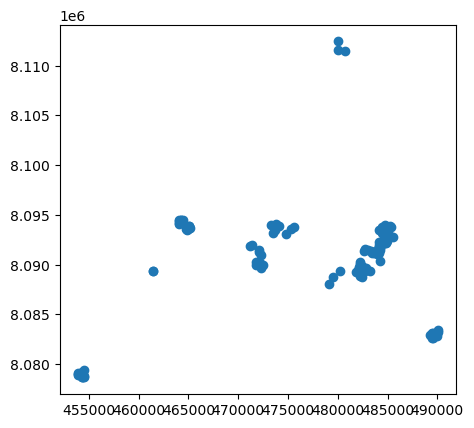

In [15]:
puntos_indi.plot()

In [16]:
# Asegurarse de que ambos GeoDataFrames tienen el mismo sistema de coordenadas (CRS)
if puntos_indi.crs != gdf_siembras.crs:
    print('Los CRS no son iguales')
    #gdf_siembras = gdf_siembras.to_crs(puntos_indi.crs)
else:
    print('Los CRS si son iguales')

Los CRS si son iguales


In [17]:
# Crear un GeoDataFrame vacío para almacenar los puntos que no intersectan con ningún polígono de siembras
puntos_indi_solicitado = puntos_indi[~puntos_indi.geometry.apply(lambda point: any(gdf_siembras.contains(point)))]

In [18]:
puntos_indi_solicitado

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
254,8842,MUÑOZ SUAREZ HUMBERTO,94,0,NaN,NaN,POINT (461395.439 8089358.224)
254,8842,MUÑOZ SUAREZ HUMBERTO,94,0,NaN,NaN,POINT (461415.101 8089409.814)
255,8842,MUÑOZ SUAREZ HUMBERTO,94,0,NaN,NaN,POINT (454473.937 8079384.367)
255,8842,MUÑOZ SUAREZ HUMBERTO,94,0,NaN,NaN,POINT (454314.287 8079195.109)
255,8842,MUÑOZ SUAREZ HUMBERTO,94,0,NaN,NaN,POINT (453871.099 8079073.953)
...,...,...,...,...,...,...,...
264,388,AGROPECUARIA MARIANA S.R.L.,94,0,NaN,NaN,POINT (484647.489 8092862.408)
264,388,AGROPECUARIA MARIANA S.R.L.,94,0,NaN,NaN,POINT (484630.705 8092542.013)
264,388,AGROPECUARIA MARIANA S.R.L.,94,0,NaN,NaN,POINT (484609.885 8092470.260)
264,388,AGROPECUARIA MARIANA S.R.L.,94,0,NaN,NaN,POINT (484143.495 8093499.353)


In [19]:
# identifoca los lotes que se intersectan
gdf_lotes_cat = gpd.sjoin(gdf_cat, puntos_indi_solicitado, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_cat = gdf_cat.loc[gdf_cat.index.isin(gdf_lotes_cat.index)]
# copy
poligonos_intersect_cat = poligonos_intersect_cat.copy()
poligonos_intersect_cat = poligonos_intersect_cat[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area', 'soca', 'zona', 'geometry']]

In [20]:
# Cambiar el nombre de la columna 'old_name' a 'new_name'
poligonos_intersect_cat.rename(columns={'zona': 'inst'}, inplace=True)

In [21]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
58,218,DON QUIJOTE,388,AGROPECUARIA MARIANA S.R.L.,L15.1,11.698327,0,69,"POLYGON ((483963.152 8090170.657, 484159.102 8..."
643,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L19.3,4.761826,1,69,"POLYGON ((484314.922 8091706.924, 484485.050 8..."
644,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L30.5,2.609483,3,69,"POLYGON ((482729.794 8088834.318, 482645.359 8..."
648,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L1.1,15.584813,3,69,"POLYGON ((484228.852 8093568.665, 484222.526 8..."
651,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L21.1,7.264027,3,69,"POLYGON ((483415.608 8091210.736, 483399.035 8..."
...,...,...,...,...,...,...,...,...,...
13316,217,FLAMBOYAN--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L13,20.652885,2,50,"POLYGON ((471035.764 8091220.475, 471024.441 8..."
13318,217,FLAMBOYAN--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L12,9.911126,2,50,"POLYGON ((471479.652 8091516.465, 471467.746 8..."
13320,256,LOS ANDES--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L7,26.900369,10,50,"POLYGON ((479280.912 8088802.503, 479986.567 8..."
13331,256,LOS ANDES--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L3,27.529402,4,50,"POLYGON ((480011.686 8088822.087, 480010.970 8..."


In [22]:
# CAMBIAR NOMBRE DATOS DE UNIDAD_03 Y UNDIAD_04 DE LOTES SOLICITADOS A LO INDICADO EN LOS PUNTOS
# Iterar sobre cada punto y encontrar el polígono que intersecta
for idx, point in puntos_indi_solicitado.iterrows():
    point_geom = point.geometry
    matching_polygons = poligonos_intersect_cat[poligonos_intersect_cat.intersects(point_geom)]
    
    # Actualizar los campos de los polígonos que intersectan con los valores del punto
    for poly_idx in matching_polygons.index:
        poligonos_intersect_cat.at[poly_idx, 'unidad_03'] = point['unidad_03']
        poligonos_intersect_cat.at[poly_idx, 'unidad_04'] = point['unidad_04']

In [23]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
58,218,DON QUIJOTE,388,AGROPECUARIA MARIANA S.R.L.,L15.1,11.698327,0,69,"POLYGON ((483963.152 8090170.657, 484159.102 8..."
643,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L19.3,4.761826,1,69,"POLYGON ((484314.922 8091706.924, 484485.050 8..."
644,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L30.5,2.609483,3,69,"POLYGON ((482729.794 8088834.318, 482645.359 8..."
648,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L1.1,15.584813,3,69,"POLYGON ((484228.852 8093568.665, 484222.526 8..."
651,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L21.1,7.264027,3,69,"POLYGON ((483415.608 8091210.736, 483399.035 8..."
...,...,...,...,...,...,...,...,...,...
13316,217,FLAMBOYAN--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L13,20.652885,2,50,"POLYGON ((471035.764 8091220.475, 471024.441 8..."
13318,217,FLAMBOYAN--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L12,9.911126,2,50,"POLYGON ((471479.652 8091516.465, 471467.746 8..."
13320,256,LOS ANDES--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L7,26.900369,10,50,"POLYGON ((479280.912 8088802.503, 479986.567 8..."
13331,256,LOS ANDES--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L3,27.529402,4,50,"POLYGON ((480011.686 8088822.087, 480010.970 8..."


In [24]:
# agrega los campos faltantes
poligonos_intersect_cat['fecha_ini'] = ''
poligonos_intersect_cat['origen'] = 'SOLICITUD'
poligonos_intersect_cat['dias'] = 0
poligonos_intersect_cat['fecha'] = ''
poligonos_intersect_cat['os'] = ors

In [25]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os
58,218,DON QUIJOTE,388,AGROPECUARIA MARIANA S.R.L.,L15.1,11.698327,0,69,"POLYGON ((483963.152 8090170.657, 484159.102 8...",,SOLICITUD,0,,94
643,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L19.3,4.761826,1,69,"POLYGON ((484314.922 8091706.924, 484485.050 8...",,SOLICITUD,0,,94
644,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L30.5,2.609483,3,69,"POLYGON ((482729.794 8088834.318, 482645.359 8...",,SOLICITUD,0,,94
648,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L1.1,15.584813,3,69,"POLYGON ((484228.852 8093568.665, 484222.526 8...",,SOLICITUD,0,,94
651,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L21.1,7.264027,3,69,"POLYGON ((483415.608 8091210.736, 483399.035 8...",,SOLICITUD,0,,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13316,217,FLAMBOYAN--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L13,20.652885,2,50,"POLYGON ((471035.764 8091220.475, 471024.441 8...",,SOLICITUD,0,,94
13318,217,FLAMBOYAN--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L12,9.911126,2,50,"POLYGON ((471479.652 8091516.465, 471467.746 8...",,SOLICITUD,0,,94
13320,256,LOS ANDES--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L7,26.900369,10,50,"POLYGON ((479280.912 8088802.503, 479986.567 8...",,SOLICITUD,0,,94
13331,256,LOS ANDES--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L3,27.529402,4,50,"POLYGON ((480011.686 8088822.087, 480010.970 8...",,SOLICITUD,0,,94


In [26]:
# SELECCIONAR LOS LOTES DE SIEMBRAS
# identifoca los lotes que se intersectan
gdf_lotes_siem = gpd.sjoin(gdf_siembras, multipoint_gdf, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_siem = gdf_siembras.loc[gdf_siembras.index.isin(gdf_lotes_siem.index)]
# copy
poligonos_intersect_siem = poligonos_intersect_siem.copy()
# agregar campo de semana_planificacion
poligonos_intersect_siem['os'] = ors

In [27]:
# crea el campo soca, y coloca 0 o 1 dependiendo del origen
poligonos_intersect_siem['soca'] = poligonos_intersect_siem['origen'].apply(lambda x: 1 if 'SIEMBRA 2023' in x else 0)

In [28]:
poligonos_intersect_siem = poligonos_intersect_siem[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area',
       'fecha_ini', 'origen', 'dias', 'fecha', 'prioridad', 'inst', 'geometry', 'os', 'soca']]

In [29]:
poligonos_intersect_siem

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,fecha,prioridad,inst,geometry,os,soca
40,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L30.8,7.475110,31/5/2024,SIEMBRA 2023,161.0,2024-05-31,3,69.0,"POLYGON ((482130.150 8088995.760, 482104.876 8...",94,1
70,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L30.11,11.686298,16/5/2024,SIEMBRA 2023,176.0,2024-05-16,3,69.0,"POLYGON ((482104.111 8089213.948, 482099.880 8...",94,1
114,1694,EL TRILLO--BALCAZAR RAMON,18189,BALCAZAR SOLETO RAMON BERTHY,A6,2.546265,5/6/2024,SIEMBRA 2023,186.0,2024-05-06,7,69.0,"POLYGON ((464777.112 8093766.030, 464877.203 8...",94,1
115,1694,EL TRILLO--BALCAZAR RAMON,18189,BALCAZAR SOLETO RAMON BERTHY,A8,2.070292,8/18/2024,SIEMBRA 2023,82.0,2024-08-18,7,69.0,"POLYGON ((464906.433 8093680.304, 464970.924 8...",94,1
126,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L30.1,7.108919,16/5/2024,SIEMBRA 2023,176.0,2024-05-16,3,69.0,"POLYGON ((482046.822 8089798.872, 482293.606 8...",94,1
201,1694,EL TRILLO--BALCAZAR RAMON,18189,BALCAZAR SOLETO RAMON BERTHY,C6,1.763207,28/6/2024,SIEMBRA 2023,133.0,2024-06-28,7,69.0,"POLYGON ((464233.191 8094541.618, 464336.369 8...",94,1
295,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L31.1,11.272967,5/7/2024,SIEMBRA 2023,185.0,2024-05-07,3,69.0,"POLYGON ((482504.768 8089423.810, 482758.847 8...",94,1
374,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L28.2,4.041720,16/5/2024,SIEMBRA 2023,176.0,2024-05-16,3,69.0,"POLYGON ((482297.516 8089886.911, 482298.824 8...",94,1
536,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L30.6,21.770573,2024-05-16,SIEMBRA 2024,176.0,2024-05-16,3,69.0,"POLYGON ((483043.738 8089419.171, 483344.782 8...",94,0
547,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L16,5.915662,2024-04-22,SIEMBRA 2024,200.0,2024-04-22,3,69.0,"POLYGON ((484215.046 8092239.909, 483231.027 8...",94,0


In [30]:
# Concatenar los DataFrames a lo largo de las filas (axis=0)
plan = pd.concat([poligonos_intersect_cat, poligonos_intersect_siem], axis=0)
# Si deseas restablecer el índice después de concatenar
plan.reset_index(drop=True, inplace=True)

<Axes: >

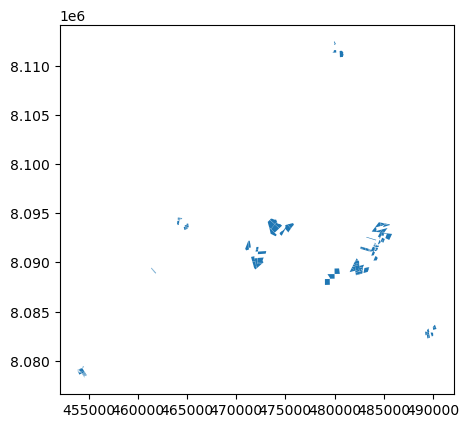

In [31]:
plan.plot()

In [32]:
plan['area'].sum()

939.2363847501169

In [33]:
#RECALCULAR EL AREA
plan['area'] = plan.geometry.area / 10000

In [34]:
plan['area'].sum()

939.2363847501736

In [35]:
# carga el shp de planificacion
gdf_plan = gpd.read_file(path_plan)

In [36]:
# determina el ultimo id
last_id = 0
if gdf_plan['id'].max() > 0:
    last_id = gdf_plan['id'].max()
else:
    last_id = 0

In [37]:
last_id

2387

In [38]:
# Asignar valores incrementales a la columna 'id' empezando desde last_id + 1
plan['id'] = range(last_id + 1, last_id + 1 + len(plan))

In [39]:
plan

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os,prioridad,id
0,218,DON QUIJOTE,388,AGROPECUARIA MARIANA S.R.L.,L15.1,11.698327,0,69,"POLYGON ((483963.152 8090170.657, 484159.102 8...",,SOLICITUD,0.0,,94,NaN,2388
1,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L19.3,4.761826,1,69,"POLYGON ((484314.922 8091706.924, 484485.050 8...",,SOLICITUD,0.0,,94,NaN,2389
2,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L30.5,2.609483,3,69,"POLYGON ((482729.794 8088834.318, 482645.359 8...",,SOLICITUD,0.0,,94,NaN,2390
3,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L1.1,15.584813,3,69,"POLYGON ((484228.852 8093568.665, 484222.526 8...",,SOLICITUD,0.0,,94,NaN,2391
4,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L21.1,7.264027,3,69,"POLYGON ((483415.608 8091210.736, 483399.035 8...",,SOLICITUD,0.0,,94,NaN,2392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L28.2,4.041720,1,69.0,"POLYGON ((482297.516 8089886.911, 482298.824 8...",16/5/2024,SIEMBRA 2023,176.0,2024-05-16,94,3.0,2498
111,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L30.6,21.770573,0,69.0,"POLYGON ((483043.738 8089419.171, 483344.782 8...",2024-05-16,SIEMBRA 2024,176.0,2024-05-16,94,3.0,2499
112,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L16,5.915662,0,69.0,"POLYGON ((484215.046 8092239.909, 483231.027 8...",2024-04-22,SIEMBRA 2024,200.0,2024-04-22,94,3.0,2500
113,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L30.2,8.144353,0,69.0,"POLYGON ((481539.278 8089009.383, 481744.255 8...",2024-04-22,SIEMBRA 2024,200.0,2024-04-22,94,3.0,2501


In [40]:
len(plan)

115

In [41]:
# union de los dos gdf
gdf_pla_gral = pd.concat([gdf_plan, plan], ignore_index=True)

In [42]:
gdf_pla_gral['area'].sum()

17917.551917507757

In [43]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['dias'] = gdf_pla_gral['dias'].astype(int)
#gdf_pla_gral['prioridad'] = gdf_pla_gral['prioridad'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [44]:
# exportar los datos en nuevo shp
gdf_pla_gral.to_file(path_plan)

In [45]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,fecha,...,os,soca,id,inst,telefono_1,telefono_2,telefono_3,idd,asignado,geometry
0,47,SANTA MARTHA,40149,PAZ REA JOSE ERNESTO,A7,10.696703,21/5/2024,SIEMBRA 2023,37,2024-05-21,...,26,1,1,69,0.0,0.0,0.0,35.0,NaN,"POLYGON ((488616.298 8103763.516, 488519.488 8..."
1,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L7.2,1.835936,2024-04-15,SIEMBRA 2024,73,2024-04-15,...,26,0,2,62,0.0,0.0,0.0,54.0,NaN,"POLYGON ((473330.370 8101634.734, 473440.011 8..."
2,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L6,1.960231,2024-04-15,SIEMBRA 2024,73,2024-04-15,...,26,0,3,62,0.0,0.0,0.0,54.0,NaN,"POLYGON ((473242.172 8101427.289, 473148.580 8..."
3,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L9.1,3.607907,2024-04-16,SIEMBRA 2024,72,2024-04-16,...,26,0,4,62,0.0,0.0,0.0,54.0,NaN,"POLYGON ((473286.579 8101086.503, 473265.875 8..."
4,2123,LAS CHACRAS PORTACHUELO,13132,ZUMARAN MENACHO JORGE,L1.6,0.386826,2024-04-22,SIEMBRA 2024,66,2024-04-22,...,26,0,5,50,0.0,0.0,0.0,63.0,NaN,"POLYGON ((455236.898 8084312.120, 455248.807 8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L28.2,4.041720,16/5/2024,SIEMBRA 2023,176,2024-05-16,...,94,1,2498,69,NaN,NaN,NaN,NaN,NaN,"POLYGON ((482297.516 8089886.911, 482298.824 8..."
2261,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L30.6,21.770573,2024-05-16,SIEMBRA 2024,176,2024-05-16,...,94,0,2499,69,NaN,NaN,NaN,NaN,NaN,"POLYGON ((483043.738 8089419.171, 483344.782 8..."
2262,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L16,5.915662,2024-04-22,SIEMBRA 2024,200,2024-04-22,...,94,0,2500,69,NaN,NaN,NaN,NaN,NaN,"POLYGON ((484215.046 8092239.909, 483231.027 8..."
2263,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L30.2,8.144353,2024-04-22,SIEMBRA 2024,200,2024-04-22,...,94,0,2501,69,NaN,NaN,NaN,NaN,NaN,"POLYGON ((481539.278 8089009.383, 481744.255 8..."


# CARGAR PLANIFICACION A AMIGOCLOUD

In [46]:
def convertir_a_multipolygon(geometry):
    if isinstance(geometry, Polygon):
        return MultiPolygon([geometry])
    return geometry

def convertir_a_wkb(polygon):
    wkb_data = wkb.dumps(polygon, hex=True)
    return wkb_data

In [47]:
# repreyectar a WGS84
gdf_pla_gral = plan.to_crs(epsg=4326)
# convertir poligonos a multipoligonos
gdf_pla_gral['geometry'] = gdf_pla_gral['geometry'].apply(convertir_a_multipolygon)

In [48]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['dias'] = gdf_pla_gral['dias'].astype(int)
#gdf_pla_gral['prioridad'] = gdf_pla_gral['prioridad'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [49]:
len(gdf_pla_gral)

115

In [50]:
# recorrer el gdf de lotes y cargarlo a amigocloud
id_proyecto = f'https://app.amigocloud.com/api/v1/projects/33457/sql'
for index, row in gdf_pla_gral.iterrows():
    wkb_hex = convertir_a_wkb(row['geometry'])
    insert_sql = f"""
    INSERT INTO dataset_345601 (id, unidad_01, unidad_02, unidad_03, unidad_04, unidad_05, area, origen, dias, os, geometry)
    VALUES ({row['id']}, {row['unidad_01']}, '{row['unidad_02']}', {row['unidad_03']}, '{row['unidad_04']}', '{row['unidad_05']}', {row['area']}, '{row['origen']}', '{row['dias']}', '{row['os']}', ST_SetSRID(ST_GeomFromWKB('\\x{wkb_hex}'), 4326));
    """
    query_sql = {'query': insert_sql}
    resultado_post = amigocloud.post(id_proyecto, query_sql)

# CREAR KMLS DE PLANIFICACION

In [51]:
gdf_plan = gpd.read_file(path_plan)

In [52]:
gdf_plan_sem = gdf_plan[gdf_plan['os'] == ors]
gdf_plan_sem['area'].sum()

939.2363847501736

In [53]:
lista_cods = list(set(gdf_plan_sem['unidad_01']))

In [54]:
lista_cods

[256, 1726, 333, 1585, 19, 949, 216, 217, 218, 1820, 1694]

In [55]:
for i in lista_cods:
    prop = gdf_plan_sem[gdf_plan_sem['unidad_01'] == i]
    prop_wgs = prop.to_crs(epsg=4326)
    output_folder = path_kml + '\\' + str(i)
    print(output_folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # Recorrer el GeoDataFrame
    for idx, row in prop_wgs.iterrows():
        # Crear un nuevo documento KML
        kml_doc = simplekml.Kml()
        # Obtener el polígono y el nombre
        polygon = row['geometry']
        name = row['unidad_05']
        # Convertir el polígono en una lista de coordenadas
        coords = [(x, y) for x, y in zip(*polygon.exterior.xy)]    
        # Añadir el polígono al documento KML
        pol = kml_doc.newpolygon(name=name, outerboundaryis=coords)
        # Guardar el archivo KML
        file_name = f"{name}.kml"
        output_path = os.path.join(output_folder, file_name)
        kml_doc.save(output_path)

C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\256
C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\1726
C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\333
C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\1585
C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\19
C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\949
C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\216
C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\217
C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_

# CARGAR XLSX

In [56]:
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from datetime import datetime

In [57]:
# Cargar el archivo Excel
sheet_name = 'DATA'
table_name = 'tbl_data'

In [58]:
excel_data = pd.read_excel(path_xlsx_parte)

In [59]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os,prioridad,id
0,218,DON QUIJOTE,388,AGROPECUARIA MARIANA S.R.L.,L15.1,11.698327,0,69,"MULTIPOLYGON (((-63.15088 -17.27361, -63.14903...",,SOLICITUD,0,,94,NaN,2388
1,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L19.3,4.761826,1,69,"MULTIPOLYGON (((-63.14756 -17.25972, -63.14596...",,SOLICITUD,0,,94,NaN,2389
2,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L30.5,2.609483,3,69,"MULTIPOLYGON (((-63.16250 -17.28568, -63.16329...",,SOLICITUD,0,,94,NaN,2390
3,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L1.1,15.584813,3,69,"MULTIPOLYGON (((-63.14836 -17.24289, -63.14842...",,SOLICITUD,0,,94,NaN,2391
4,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L21.1,7.264027,3,69,"MULTIPOLYGON (((-63.15603 -17.26420, -63.15618...",,SOLICITUD,0,,94,NaN,2392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L28.2,4.041720,1,69,"MULTIPOLYGON (((-63.16655 -17.27616, -63.16654...",16/5/2024,SIEMBRA 2023,176,2024-05-16,94,3.0,2498
111,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L30.6,21.770573,0,69,"MULTIPOLYGON (((-63.15954 -17.28039, -63.15670...",2024-05-16,SIEMBRA 2024,176,2024-05-16,94,3.0,2499
112,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L16,5.915662,0,69,"MULTIPOLYGON (((-63.14850 -17.25490, -63.15775...",2024-04-22,SIEMBRA 2024,200,2024-04-22,94,3.0,2500
113,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L30.2,8.144353,0,69,"MULTIPOLYGON (((-63.17370 -17.28408, -63.17176...",2024-04-22,SIEMBRA 2024,200,2024-04-22,94,3.0,2501


In [60]:
list(gdf_pla_gral['unidad_01'])

[218,
 19,
 19,
 19,
 19,
 333,
 333,
 333,
 333,
 333,
 333,
 333,
 218,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 1585,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 1694,
 949,
 1726,
 1726,
 1726,
 1726,
 1726,
 19,
 19,
 1726,
 1726,
 1726,
 1726,
 1726,
 19,
 19,
 333,
 19,
 19,
 333,
 333,
 1694,
 1694,
 1694,
 1694,
 19,
 19,
 1694,
 19,
 19,
 19,
 1694,
 19,
 19,
 19,
 19,
 19,
 1694,
 19,
 1694,
 1694,
 19,
 1820,
 19,
 1585,
 1694,
 949,
 1694,
 1694,
 949,
 1694,
 216,
 216,
 216,
 216,
 216,
 216,
 216,
 216,
 217,
 217,
 217,
 217,
 217,
 217,
 217,
 217,
 217,
 217,
 217,
 256,
 256,
 256,
 19,
 19,
 1694,
 1694,
 19,
 1694,
 19,
 19,
 19,
 19,
 19,
 19]

In [61]:
new_data = {
    'INSTITUCION':list(gdf_pla_gral['inst']), 
    'COD CANERO': list(gdf_pla_gral['unidad_03']),
    'NOMBRE CANERO': list(gdf_pla_gral['unidad_04']),
    'COD PROPIEDAD': list(gdf_pla_gral['unidad_01']),
    'NOMBRE PROPIEDAD': list(gdf_pla_gral['unidad_02']),
    'LOTE': list(gdf_pla_gral['unidad_05']),
    'HECTAREA': list(gdf_pla_gral['area']),
    'CICLO': list(gdf_pla_gral['soca']),
    'FINANCIADO': list(gdf_pla_gral['origen']),
    'ID': list(gdf_pla_gral['id']),
    'OS': list(gdf_pla_gral['os'])
}

new_df = pd.DataFrame(new_data)

In [62]:
new_df['PRODUCTO'] = 'TRICHOGRAMMA'
new_df['DOSIS'] = '6ml'

In [63]:
new_df

,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,CICLO,FINANCIADO,ID,OS,PRODUCTO,DOSIS
0,69,388,AGROPECUARIA MARIANA S.R.L.,218,DON QUIJOTE,L15.1,11.698327,0,SOLICITUD,2388,94,TRICHOGRAMMA,6ml
1,69,388,AGROPECUARIA MARIANA S.R.L.,19,SANTA BARBARA,L19.3,4.761826,1,SOLICITUD,2389,94,TRICHOGRAMMA,6ml
2,69,388,AGROPECUARIA MARIANA S.R.L.,19,SANTA BARBARA,L30.5,2.609483,3,SOLICITUD,2390,94,TRICHOGRAMMA,6ml
3,69,388,AGROPECUARIA MARIANA S.R.L.,19,SANTA BARBARA,L1.1,15.584813,3,SOLICITUD,2391,94,TRICHOGRAMMA,6ml
4,69,388,AGROPECUARIA MARIANA S.R.L.,19,SANTA BARBARA,L21.1,7.264027,3,SOLICITUD,2392,94,TRICHOGRAMMA,6ml
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,69,18358,ROJAS AMELUNGE CARLOS,19,SANTA BARBARA,L28.2,4.041720,1,SIEMBRA 2023,2498,94,TRICHOGRAMMA,6ml
111,69,18358,ROJAS AMELUNGE CARLOS,19,SANTA BARBARA,L30.6,21.770573,0,SIEMBRA 2024,2499,94,TRICHOGRAMMA,6ml
112,69,18358,ROJAS AMELUNGE CARLOS,19,SANTA BARBARA,L16,5.915662,0,SIEMBRA 2024,2500,94,TRICHOGRAMMA,6ml
113,69,18358,ROJAS AMELUNGE CARLOS,19,SANTA BARBARA,L30.2,8.144353,0,SIEMBRA 2024,2501,94,TRICHOGRAMMA,6ml


In [64]:
final_data = pd.concat([excel_data, new_df], ignore_index=True)

In [65]:
final_data.to_excel(path_xlsx_parte, index=False)